# Multivariate Linear Regression

## 1. Data creation
$$f(x)=\frac{1}{2}x^2+\frac{1}{2}x+\text{error}\\ \text{where} -2.5\lt x\lt2.5$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_samples = 200
x = 5 * np.random.rand(num_samples, 1) - 2.5
y = 1/2 * x**2 + 1/2 * x + np.random.rand(num_samples, 1)

In [3]:
x = x.reshape(-1,)
y = y.reshape(-1,)

In [4]:
train_set = pd.DataFrame({'x': x, 'y': y})
train_set.head()

,x,y
0,-2.268909,2.157489
1,-1.378413,1.232108
2,-0.135544,0.558797
3,1.759255,2.823208
4,1.039713,2.000724


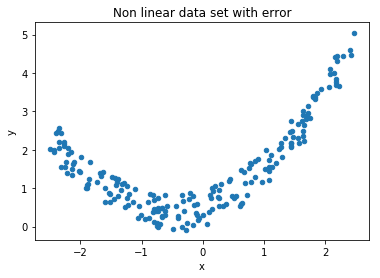

In [5]:
train_set.plot(x='x', y='y', kind='scatter', title='Non linear data set with error')

## 2. Fitting the model

In [6]:
# 2차 이상의 다항식을 fitting 하기 위해서 PolynomialFeatures를 사용합니다.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [7]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lin_reg.intercept_

0.5362133410732012

In [10]:
# Fitting 결과
lin_reg.coef_

array([0.51306057, 0.50311102])

Trainin set과 Predicted curve를 비교해보자.

In [11]:
x_new = np.linspace(-2.5, 2.5, 100).reshape(-1, 1)
x_poly_new = poly_features.fit_transform(x_new)
y_pred = lin_reg.predict(x_poly_new)

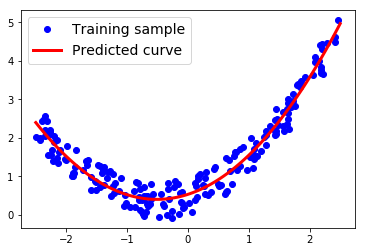

In [12]:
plt.plot(x, y, 'bo', label='Training sample')
plt.plot(x_new, y_pred.reshape(-1, 1), 'r-', linewidth=3, label='Predicted curve')
plt.legend(loc='upper left', fontsize=14)

# Underfitting vs Overfitting

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

## 1. Underfitting

In [14]:
# Degree of polynoimial : 1
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
simple_polynomial_regression = Pipeline(
    [('poly_features', PolynomialFeatures(degree=1, include_bias=False)), 
     ('lin_reg', LinearRegression())]
)

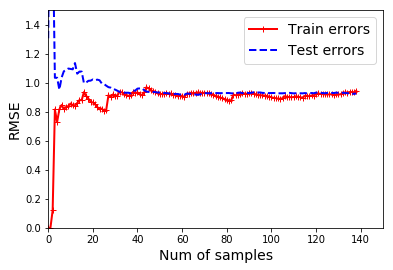

In [15]:
# Underfitting
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)
train_errors, val_errors = [], []
for i in range(1, len(x_train)):
    simple_polynomial_regression.fit(x[:i], y[:i])
    train_pred = simple_polynomial_regression.predict(x[:i])
    val_pred = simple_polynomial_regression.predict(x_val)
    train_errors.append(mean_squared_error(y[:i], train_pred))
    val_errors.append(mean_squared_error(y_val, val_pred))
plt.axis([0, 150, 0, 1.5])
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train errors')
plt.plot(np.sqrt(val_errors), 'b--', linewidth=2, label='Test errors')
plt.xlabel('Num of samples', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend(fontsize=14)

## 2. Overfitting

In [16]:
# Degree of polynoimial : 10
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
high_polynomial_regression = Pipeline(
    [('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
     ('lin_reg', LinearRegression())]
)

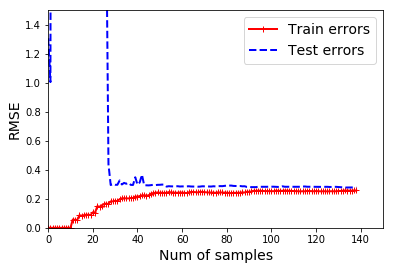

In [17]:
# Underfitting
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)
train_errors, val_errors = [], []
for i in range(1, len(x_train)):
    high_polynomial_regression.fit(x[:i], y[:i])
    train_pred = high_polynomial_regression.predict(x[:i])
    val_pred = high_polynomial_regression.predict(x_val)
    train_errors.append(mean_squared_error(y[:i], train_pred))
    val_errors.append(mean_squared_error(y_val, val_pred))
plt.axis([0, 150, 0, 1.5])
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train errors')
plt.plot(np.sqrt(val_errors), 'b--', linewidth=2, label='Test errors')
plt.xlabel('Num of samples', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend(fontsize=14)